<a href="https://colab.research.google.com/github/marriamaslova/ML_homeworks/blob/main/ml_hw7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В продолжение датасета на занятиии, будем кластеризовать отзывы в о винах. В этой директории лежит zip-архив, в котором есть датасет winemag-data-130k-v2.csv Давайте на его основе датасета сделаем кластеризацию. Также данные можно скачать отсюда

Подготовьте данные: в датасете 10 колонок, некоторые из них текстовые. Можно использовать колонки, которые на Ваш взгляд наиболее информативны: можно использовать все, можно убрать некоторые.
Если вы используете текстовые колонки, их содержимое следует векторизовать (Doc2Vec, TF-IDF vectorizer, Bert embeddings -- любое на ваш выбор)
Для некоторых алгоритмов кластеризации лучше предварительно сделать уменьшение размерности датасета (например, для K-means)

Выберите любые 2 алгоритма кластеризации

Проверьте кластеры с помощью метрик: inertia, silhouette score

Расскажите о результатах

Визуализации принесут дополнительные 2 балла за дз(да, если вы сделаете все супер-классно, можно получить и больше 10), но добавляются по желанию

In [1]:
# imports here
import pandas as pd
import numpy as np

#viz
import seaborn as sns
import matplotlib.pyplot as plt

# progress bar
from tqdm import tqdm

In [2]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [ ]:
from nltk.tokenize import word_tokenize, wordpunct_tokenize
import nltk
nltk.download('punkt')

In [4]:
data = pd.read_csv('/content/winemag-data-130k-v2.csv')

In [5]:
print(data.shape)
data.head(5)

(129971, 14)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Выбрала для датасета следующие колонки: country, points, province, variety, winery. Кажется, по ним действительно можно как-то кластеризовать данные.

Векторизация текстовых данных

Колонка country

In [6]:
data["country"] = data["country"].astype(str)

In [7]:
data["country_tokens"] = data.country.apply(lambda x: nltk.word_tokenize(x))

In [8]:
input_country = list(data.country_tokens.values)
documents_country = [TaggedDocument(doc, [i]) for i, doc in enumerate(input_country)]

In [9]:
model_country = Doc2Vec(documents_country, vector_size=1, window=1, min_count=1, workers=4)

In [10]:
model_country.save("model_country.model")

In [11]:
vectors_country = []
for x in documents_country:
    vec = list(model_country[x.tags][0])
    vectors_country.append(vec)

In [12]:
country_df = pd.DataFrame(vectors_country,
                        columns=['country_vec'])

Колонка province

In [13]:
data["province"] = data["province"].astype(str)

In [14]:
data["province_tokens"] = data.province.apply(lambda x: nltk.word_tokenize(x))

In [15]:
input_province = list(data.province_tokens.values)
documents_province = [TaggedDocument(doc, [i]) for i, doc in enumerate(input_province)]

In [16]:
model_province = Doc2Vec(documents_province, vector_size=1, window=3, min_count=1, workers=4)

In [17]:
model_province.save("model_province.model")

In [18]:
vectors_province = []
for x in documents_province:
    vec = list(model_province[x.tags][0])
    vectors_province.append(vec)

In [19]:
province_df = pd.DataFrame(vectors_province,
                        columns=['province_vec'])

Колонка variety

In [20]:
data["variety"] = data["variety"].astype(str)

In [21]:
data["variety_tokens"] = data.variety.apply(lambda x: nltk.word_tokenize(x))

In [22]:
input_variety = list(data.variety_tokens.values)
documents_variety = [TaggedDocument(doc, [i]) for i, doc in enumerate(input_variety)]

In [23]:
model_variety = Doc2Vec(documents_variety, vector_size=1, window=3, min_count=1, workers=4)

In [24]:
model_variety.save("model_variety.model")

In [25]:
vectors_variety = []
for x in documents_variety:
    vec = list(model_variety[x.tags][0])
    vectors_variety.append(vec)

In [26]:
variety_df = pd.DataFrame(vectors_variety,
                        columns=['variety_vec'])

Колонка winery

In [27]:
data["winery"] = data["winery"].astype(str)

In [28]:
data["winery_tokens"] = data.winery.apply(lambda x: nltk.word_tokenize(x))

In [29]:
input_winery = list(data.winery_tokens.values)
documents_winery = [TaggedDocument(doc, [i]) for i, doc in enumerate(input_winery)]

In [30]:
model_winery = Doc2Vec(documents_winery, vector_size=1, window=3, min_count=1, workers=4)

In [31]:
model_winery.save("model_winery.model")

In [32]:
vectors_winery = []
for x in documents_winery:
    vec = list(model_winery[x.tags][0])
    vectors_winery.append(vec)

In [33]:
winery_df = pd.DataFrame(vectors_winery,
                        columns=['winery_vec'])

Соединяю результаты векторизации в итоговый датафрейм

In [34]:
result = data.join((country_df, province_df, variety_df, winery_df), how='left')

In [35]:
data_final = result[[
                'points', 'country_vec',
                'province_vec', "variety_vec","winery_vec"]
              ]

In [36]:
data_final.head(5)

,points,country_vec,province_vec,variety_vec,winery_vec
0,87,-0.053623,-0.053623,4.905800,4.595386
1,87,0.023643,0.023643,4.986078,5.877794
2,87,0.510335,6.370870,4.975002,5.000770
3,87,0.900927,0.900927,4.822270,7.607647
4,87,-0.930295,-0.930295,4.500780,4.866244


Подготовка данных

In [37]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
data_scaled=data_final.copy()
data_scaled[data_scaled.columns]=std_scaler.fit_transform(data_scaled)

In [38]:
data_scaled.head(3)

,points,country_vec,province_vec,variety_vec,winery_vec
0,-0.476076,-0.104668,-0.168455,8.229039,6.588353
1,-0.476076,0.028868,-0.036955,8.365146,8.486025
2,-0.476076,0.870001,10.765437,8.346368,7.188229


<Axes: >

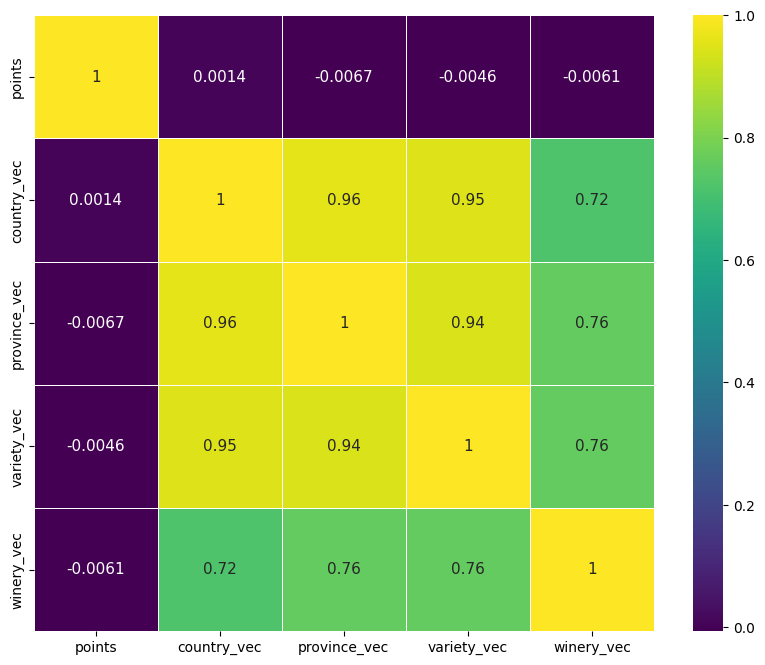

In [39]:
corr = data_scaled.corr()

plt.figure(figsize=(10,8))

sns.heatmap(corr, linewidths=.5, cmap='viridis', annot=True,annot_kws={"size": 11})

<Axes: >

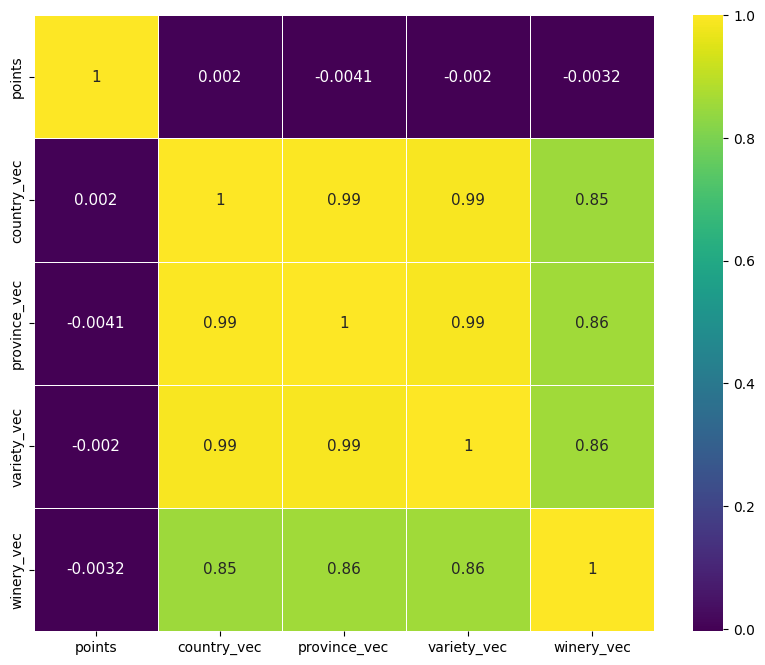

In [40]:
corr_1 = data_scaled.corr(method="spearman")

plt.figure(figsize=(10,8))

sns.heatmap(corr_1, linewidths=.5, cmap='viridis', annot=True,annot_kws={"size": 11})

In [41]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
pca_2_result = pca_2.fit_transform(data_scaled) 
pca_2_result.shape

(129971, 2)

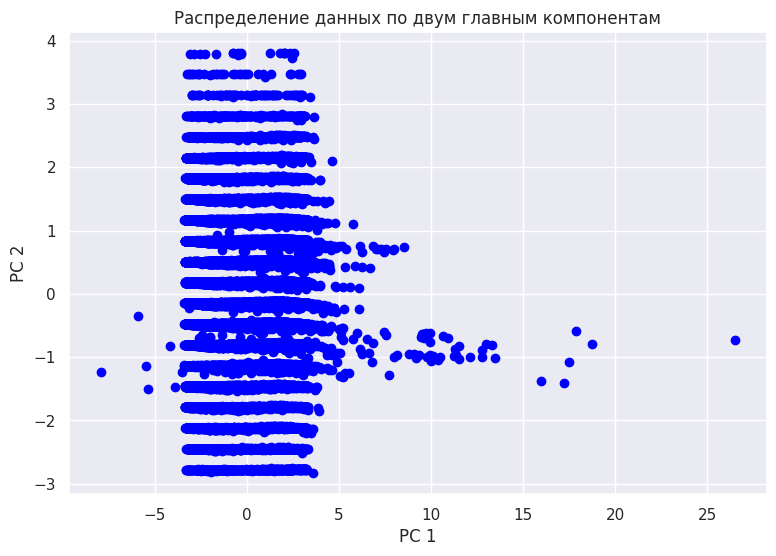

In [42]:
sns.set(rc={'figure.figsize':(9,6)},font_scale=1)

plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1], color='blue') # 0 и 1 - индексы колонок
plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.title('Распределение данных по двум главным компонентам')
plt.show()

K-means

In [51]:
import sklearn.cluster as cluster

# inertia = {} # сюда будем сохранять значения
inertia = []
for i in tqdm(range(2,20)): # значения интервала - число кластеров (можно изменять) 
    
    kmeans = cluster.KMeans(
               n_clusters=i, # инициализируем модель
               init='k-means++', # метод, как разбросать центры среди данных
               n_init=15, # сколько раз будем переопределять центры (в результате выберем самый успешный)
               max_iter=500, # количество итераций а один проход алгоритма
               random_state=17 # сколько раз датасет перемешан перед кластеризацией
    ) 
    
    
    kmeans.fit(pca_2_result) # обучаем модель 
    inertia.append(kmeans.inertia_)

100%|██████████| 18/18 [01:16<00:00,  4.24s/it]


In [52]:
from sklearn.metrics import silhouette_score

# все как в предыдущей ячейке, только силуэт-скоры сохраняем как значения в словаре
silhouette = {}
for i in tqdm(range(2,20)):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(pca_2_result)
    
    silhouette[i] = silhouette_score(pca_2_result, kmeans.labels_, metric='euclidean')

100%|██████████| 18/18 [51:19<00:00, 171.07s/it]


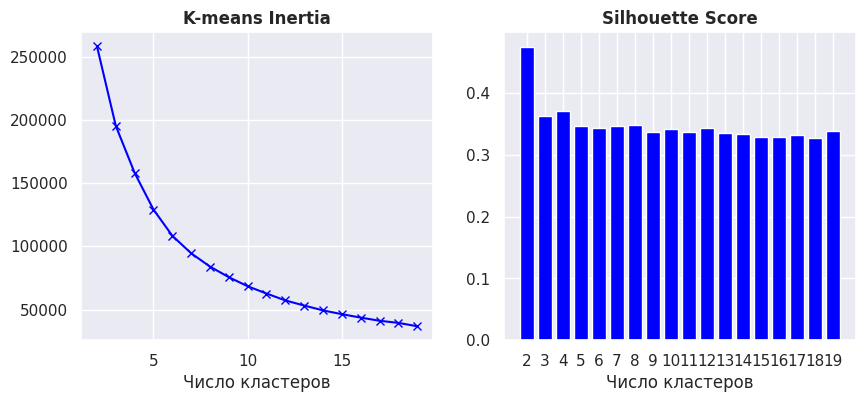

In [53]:
sns.set(font_scale=1, rc={'figure.figsize':(10,4)})

plt.subplot(1, 2, 1) # аргументы: nrows, ncols, index

plt.plot(range(2,len(inertia)+2), inertia, marker='x',color='blue') 
# первый параметр = x (число шагов= числу кластеров), второй = y (инерция)

plt.xlabel('Число кластеров')
plt.title('K-means Inertia',fontweight='bold')
plt.grid(True)

plt.subplot(1, 2, 2) # аргументы: nrows, ncols, index

plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',color= 'blue')
plt.xticks(range(len(silhouette)), list(silhouette.keys())) # отметки на шкале
plt.grid(True)
plt.title('Silhouette Score',fontweight='bold')
plt.xlabel('Число кластеров')


plt.show()

In [54]:
kmeans = cluster.KMeans(n_clusters=2,random_state=17,init='k-means++')

kmeans_labels = kmeans.fit_predict(pca_2_result)
# вычисляем центры кластеров и предугадываем номер кластера для каждого семпла данных

centroids = kmeans.cluster_centers_

display(pd.Series(kmeans_labels).value_counts()) # кол-во вин по кластерам

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    65023
1    64948
dtype: int64

In [55]:
data_scaled['Cluster']=kmeans_labels

pca_2_df = pd.DataFrame(pca_2_result)
pca_2_df['Cluster']=kmeans_labels

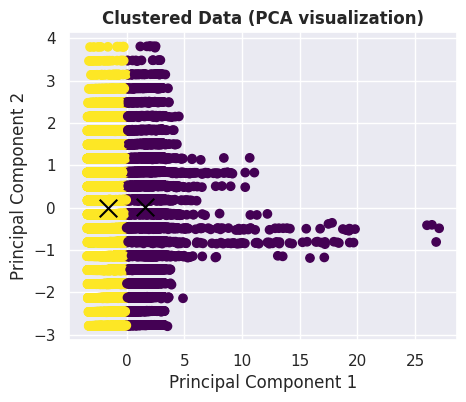

In [56]:
sns.set( rc={'figure.figsize':(5,4)},font_scale=1)

plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=160, color='black')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# добавить легенду

plt.title('Clustered Data (PCA visualization)',fontweight='bold')

plt.show()

In [57]:
print("Inertia score: %0.1f" % kmeans.inertia_,
     "\nSilhouette score: %0.1f" % silhouette_score(pca_2_result, kmeans.labels_, metric='euclidean'))

Inertia score: 258426.2 
Silhouette score: 0.5


Не очень понравились показатели результата кластеризации (см выше). Инерция большая, силуэт мог бы быть побольше. В визуализации вижу плотные кластеры, но выбросы второй все же делают более рыхлым. 

Впрочем, я попробовала деление на 4 кластера, и получилось еще хуже по показателям. Значит, все-таки, лучший вариант для данного датасета при методе k-means - это 2 кластера.

DBSCAN

In [42]:
from sklearn.cluster import AffinityPropagation, AgglomerativeClustering, DBSCAN,\
                            MeanShift, SpectralClustering

from sklearn import metrics

from sklearn.datasets import make_blobs

Уменьшила размерность датасета и для DBSCAN, поскольку без уменьшения размерности работает все как-то удручающе долго. 

In [43]:
X = pca_2_result

In [44]:
cluster = DBSCAN(min_samples=2, eps=0.5)

In [45]:
cluster.fit(X)

DBSCAN(min_samples=2)

In [ ]:
data_scaled['Cluster'] = cluster.labels_
data_scaled['Cluster'].value_counts() 

In [47]:
data_scaled['Cluster'] = cluster.labels_
data_scaled.groupby(['Cluster']).mean()

,points,country_vec,province_vec,variety_vec,winery_vec
Cluster,,,,,
-1,-0.037439,0.454042,1.317919,8.497679,7.926943
0,0.000232,-0.000581,-0.003311,-0.004203,-0.004640
1,-0.695395,0.080139,6.273925,9.779305,10.639944
2,-0.805054,0.580045,12.693530,7.987592,10.201619
3,-0.602606,2.547623,9.979630,12.061084,13.552352
4,-0.476076,16.683203,10.199714,4.521059,22.342797
5,-0.805054,0.336742,10.203485,11.995176,11.606401
6,-0.640565,1.317330,15.018242,23.284576,14.409605
7,0.675346,-0.585076,5.473277,8.122805,7.890757


In [50]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X,cluster.labels_ ))

Silhouette Coefficient: 0.700


Результат DBSCAN по метрике silhouette понравился больше. Он подходит для этого датасета как минимум потому, что может отфильтровывать выбросы (а это актуально для наших данных, что видно по самой общей визуализации).